## Jay Chou Lyrics Common Terms

In [36]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, 'modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [29]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 2


### 製作詞頻矩陣

下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的fintextmin函式

In [34]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.723 seconds.
Prefix dict has been built succesfully.


In [35]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('接下', 1),
 ('來', 1),
 ('在', 11),
 ('送', 1),
 ('你', 1),
 ('最', 1),
 ('後', 1),
 ('一首歌', 1),
 ('才', 1),
 ('離開', 1)]

In [37]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/home/aesophor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,一起,拌,美,浪漫,唇,一定,半空,左岸,看著,回憶,...,我手,嘟嘟,快樂,來,有點,離開,知難,在,會,最貴
0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,7.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,11.0,1.0,0.0
1,1.0,1.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,...,2.0,0.0,0.0,0.0,2.0,0.0,2.0,6.0,2.0,2.0


### 製作TF-IDF矩陣

可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [38]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,一起,拌,美,浪漫,唇,一定,半空,左岸,看著,回憶,...,我手,嘟嘟,快樂,來,有點,離開,知難,在,會,最貴
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0493,0.086276,0.000000,0.086276,0.000000,...,0.000000,0.012325,0.012325,0.012325,0.000000,0.012325,0.000000,0.096463,0.008769,0.000000
1,0.039908,0.039908,0.079817,0.079817,0.079817,0.0000,0.000000,0.079817,0.000000,0.039908,...,0.079817,0.000000,0.000000,0.000000,0.079817,0.000000,0.079817,0.170371,0.056790,0.079817


### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [39]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('一起', 0.0),
 ('拌', 0.0),
 ('美', 0.0),
 ('浪漫', 0.0),
 ('唇', 0.0),
 ('一定', 4.0),
 ('半空', 7.0),
 ('左岸', 0.0),
 ('看著', 7.0),
 ('回憶', 0.0)]

## 文字雲

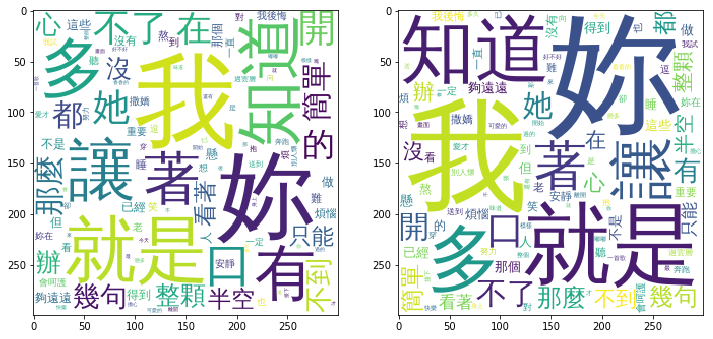

In [42]:
linux_font = r'/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

## 長條圖

可以發現，經過TF-IDF處理之後，比較重要的資訊如「股價」、「747」(註：此指波音747)等詞彙被突顯出來。

每篇文章都會出現的「華航」和所有格用字「的」排序則向下調整。

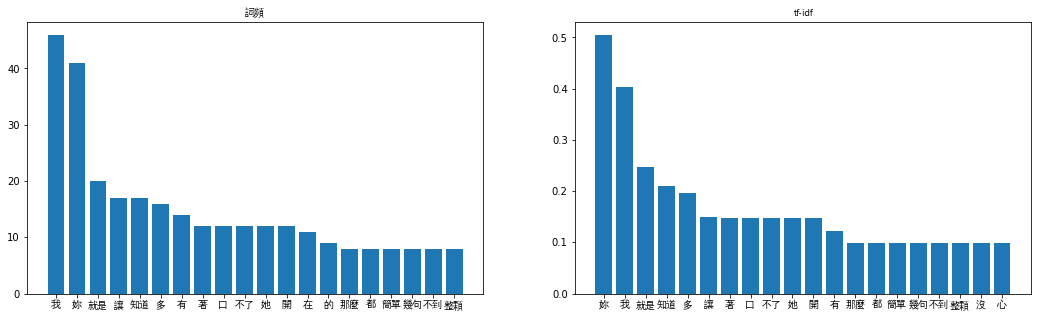

In [43]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")